# Project 1 - CIFAR 10

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset

import numpy as np
import copy
from sklearn.model_selection import train_test_split

import torchvision

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')

In [4]:
cdata = torchvision.datasets.CIFAR10(root='../data/cifar10/')

In [5]:
cdata

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ../data/cifar10/
    Split: Train

In [6]:
print(cdata.data.shape)
print(cdata.classes)
print(len(cdata.targets))

(50000, 32, 32, 3)
['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
50000


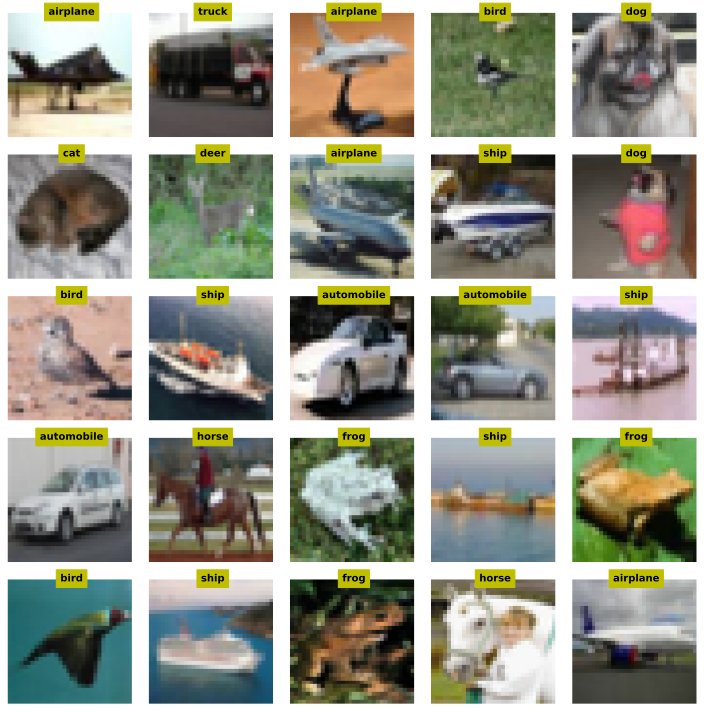

In [7]:
# inspect a few random images

fig,axs = plt.subplots(5,5,figsize=(10,10))

for ax in axs.flatten():

    # select a random picture
    randidx = np.random.choice(len(cdata.targets))

    # extract that image
    pic = cdata.data[randidx,:,:,:]
    # and its label
    label = cdata.classes[cdata.targets[randidx]]

    # and show!
    ax.imshow(pic)
    ax.text(16,0,label,ha='center',fontweight='bold',color='k',backgroundcolor='y')
    ax.axis('off')

plt.tight_layout()
plt.show()

In [10]:
X_train, X_test, y_train, y_test = train_test_split(cdata.data, cdata.classes, test_size=.2, stratify=cdata.classes)

train_ds = TensorDataset(X_train, y_train)
test_ds = TensorDataset(X_test, y_test)

bs = 4
trainLoader = DataLoader(train_ds, batch_size=bs, shuffle=True, drop_last=True)
testLoader = DataLoader(test_ds, batch_size=test_ds.tensors[0].shape[0])

ValueError: Found input variables with inconsistent numbers of samples: [50000, 10]